In [20]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [21]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
print(data.shape)

(1338, 7)


In [23]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [25]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [27]:
temp_data = data.copy()

In [28]:
types = temp_data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['age', 'bmi', 'children', 'charges']

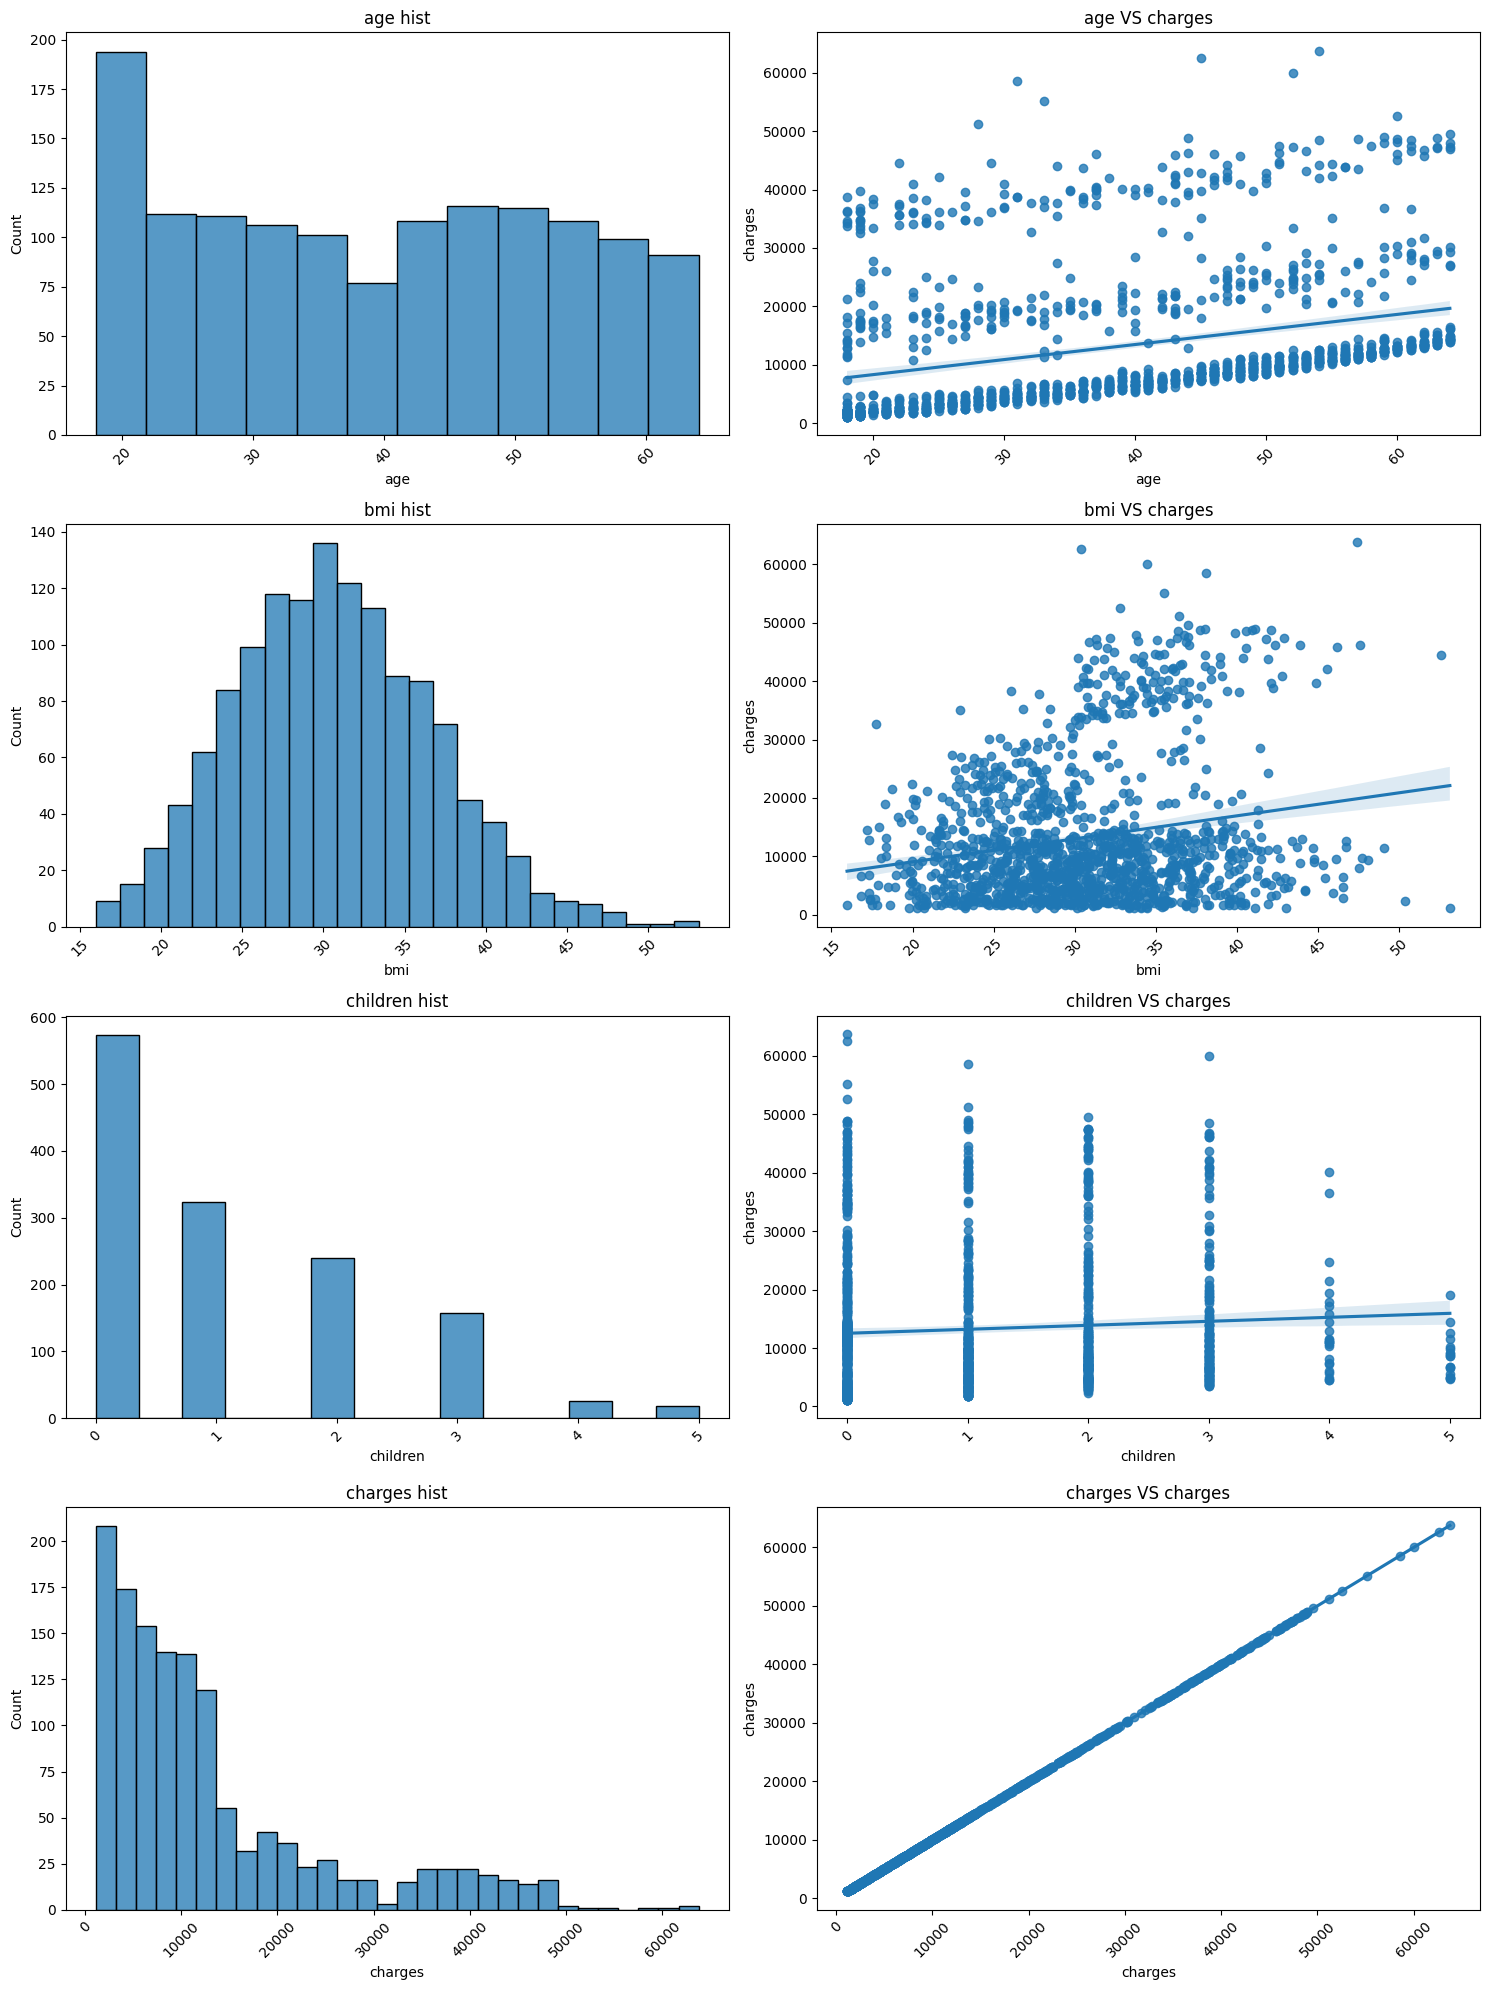

In [29]:
n = len(num_features)
fig, axes = plt.subplots(n, 2, figsize=(15, 20))
for i, feature in enumerate(num_features):
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    histplot.set_title(f'{feature} hist')
    histplot.xaxis.set_tick_params(rotation=45)
    regplot = sns.regplot(data=temp_data, x=feature, y='charges', ax=axes[i][1])
    regplot.set_title(f'{feature} VS charges')
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout()

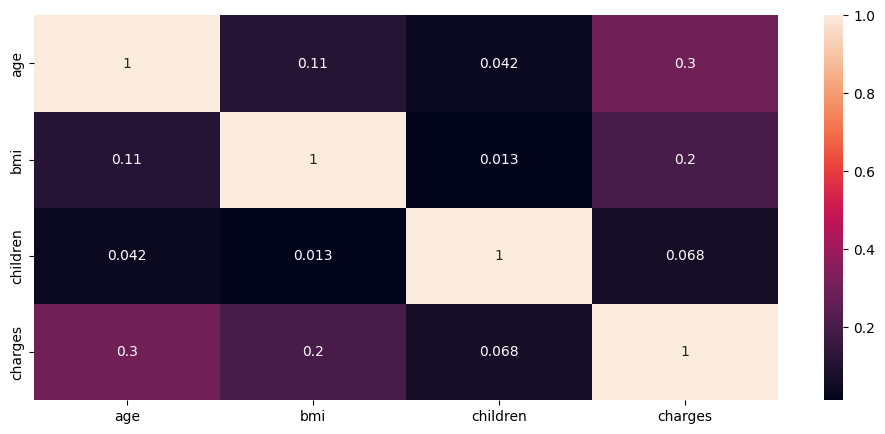

In [30]:
fig = plt.figure(figsize=(12,5))
sns.heatmap(temp_data[num_features].corr(), annot=True);

In [31]:
temp_data['smoker'] = temp_data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
temp_data['sex'] = temp_data['sex'].apply(lambda x: 0 if x == 'female' else 1)
temp_data = pd.get_dummies(temp_data, dtype='int')
temp_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [38]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict).round()))
    print('Train MAPE: {:.3f}'.format(round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100)))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict).round()))
    print('Train MAPE: {:.3f}'.format(round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100)))

In [32]:
features = temp_data.drop('charges', axis=1).columns
X, y = temp_data[features], temp_data['charges']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1070, 9)
Test shape: (268, 9)


In [35]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

print(f'Свободный член: {lr.intercept_.round(2)}')

Свободный член: -12390.8


In [39]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208.000
Train MAPE: 42.000


Test R^2: 0.784
Test MAE: 4181.000
Train MAPE: 47.000
